In [1]:
import os
import sys
import librosa.display
from matplotlib import rc
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from src.hparams import HParamsFromYAML
from src.features import LogMelSpectrogram, MfccSpectrogram, ChromaSpectrogram
sys.path.pop(0);

In [6]:
%matplotlib inline
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rc('text', usetex=True)

In [7]:
params = HParamsFromYAML('../hparams.yaml', param_sets=['log_mel'])
AUDIO_FILE_PATH = os.path.join(
    '..',
    params.datasets_dir,
    params.train_data_dir,
    '75923738.wav'
)
mel = LogMelSpectrogram(params)
S = mel.get_spectrogram(AUDIO_FILE_PATH, transpose=False)

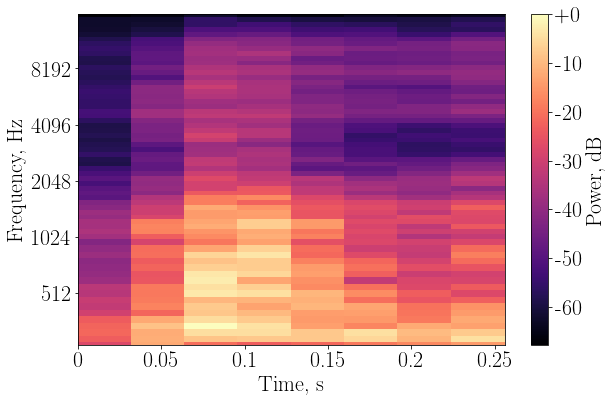

In [8]:
fig = plt.figure(figsize=(9, 6))
plt.subplot()
#plt.title(
#    'Log-mel spectrogram of %s audio' % '/'.\
#    join(AUDIO_FILE_PATH.split('/')[1:]).replace('_', '\_'),
#    fontsize=18
#)
librosa.display.specshow(
    S,
    sr=params.sample_rate,
    hop_length=params.hop_length,
    x_axis='time',
    y_axis='mel',
    fmin=mel.min_frequency,
    fmax=mel.max_frequency
)
plt.xlabel('Time, s', fontsize=22)
plt.ylabel('Frequency, Hz', fontsize=22)
cbar = plt.colorbar(format='%+2.0f')
cbar.ax.set_ylabel('Power, dB', fontsize=22)

fig.tight_layout(pad=1.0)
fig.savefig('mel_spectrogram_example.pdf')

In [9]:
params = HParamsFromYAML('../hparams.yaml', param_sets=['mfcc'])
AUDIO_FILE_PATH = os.path.join(
    '..',
    params.datasets_dir,
    params.train_data_dir,
    '75923738.wav'
)
mfcc = MfccSpectrogram(params)
S = mfcc.get_spectrogram(AUDIO_FILE_PATH, transpose=False)

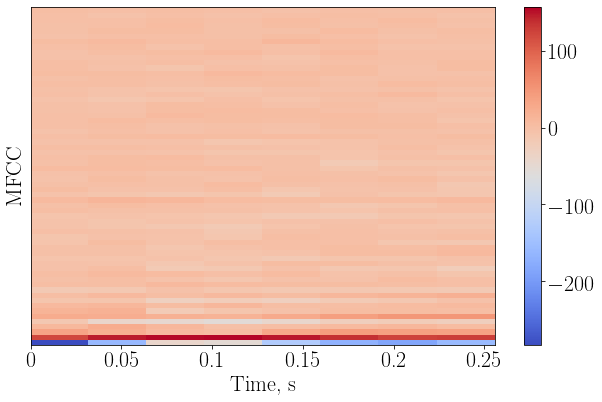

In [10]:
fig = plt.figure(figsize=(9, 6))
plt.subplot()
#plt.title(
#    'MFCC spectrogram of %s audio' % '/'.\
#    join(AUDIO_FILE_PATH.split('/')[1:]).replace('_', '\_'),
#    fontsize=18
#)
librosa.display.specshow(
    S,
    sr=params.sample_rate,
    hop_length=params.hop_length,
    x_axis='time',
    fmin=mfcc.min_frequency,
    fmax=mfcc.max_frequency
)
plt.xlabel('Time, s', fontsize=22)
plt.ylabel('MFCC', fontsize=22)
plt.colorbar()

fig.tight_layout(pad=1.0)
fig.savefig('mfcc_spectrogram_example.pdf')

In [11]:
params = HParamsFromYAML('../hparams.yaml', param_sets=['chroma'])
AUDIO_FILE_PATH = os.path.join(
    '..',
    params.datasets_dir,
    params.train_data_dir,
    '75923738.wav'
)
chroma = ChromaSpectrogram(params)
S = chroma.get_spectrogram(AUDIO_FILE_PATH, transpose=False)

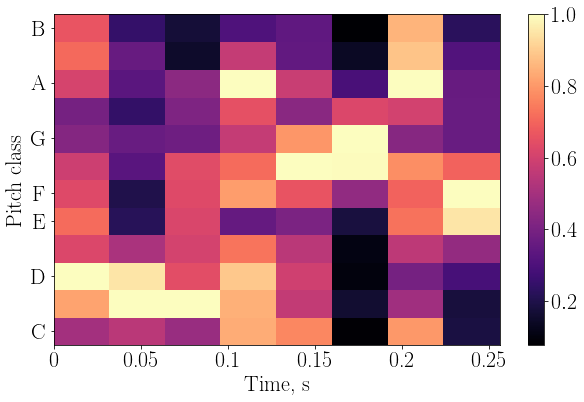

In [12]:
fig = plt.figure(figsize=(9, 6))
plt.subplot()
#plt.title(
#    'Chromagram of %s audio' % '/'.\
#    join(AUDIO_FILE_PATH.split('/')[1:]).replace('_', '\_'),
#    fontsize=18
#)
librosa.display.specshow(
    S,
    sr=params.sample_rate,
    hop_length=params.hop_length,
    x_axis='time',
    y_axis='chroma'
)
plt.xlabel('Time, s', fontsize=22)
plt.ylabel('Pitch class', fontsize=22)
plt.colorbar()

fig.tight_layout(pad=1.0)
fig.savefig('chromagram_example.pdf')